<a href="https://colab.research.google.com/github/Shirui-peng/SURD/blob/main/examples/E02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pymp-pypi
import os, sys
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import matplotlib.colors as mcolors # type: ignore
import analytic_eqs as cases
import surd as surd
np.random.seed(10)

# Configure matplotlib to use LaTeX for text rendering and set font size
# plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 18})

In [2]:
Nt = 5*10**7            # Number of time steps to perform the integration of the system
samples = Nt-10000      # Number of samples to be considered (remove the transients)
nbins = 50              # Number of bins to disctrize the histogram
nlag = 1                # Time lag to perform the causal analysis

Loaded data for mediator
SURD CAUSALITY FOR SIGNAL 2
    Redundant (R):
        (1, 2)      : 0.0000
        (1, 3)      : 0.0000
        (2, 3)      : 0.0297
        (1, 2, 3)   : 0.0024
    Unique (U):
        (1,)        : 0.0000
        (2,)        : 0.0000
        (3,)        : 0.9624
    Synergystic (S):
        (1, 2)      : 0.0000
        (1, 3)      : 0.0004
        (2, 3)      : 0.0001
        (1, 2, 3)   : 0.0051
    Information Leak: 87.83%


SURD CAUSALITY FOR SIGNAL 1
    Redundant (R):
        (1, 2)      : 0.0000
        (1, 3)      : 0.0000
        (2, 3)      : 0.0042
        (1, 2, 3)   : 0.0058
    Unique (U):
        (1,)        : 0.0000
        (2,)        : 0.9896
        (3,)        : 0.0000
    Synergystic (S):
        (1, 2)      : 0.0000
        (1, 3)      : 0.0000
        (2, 3)      : 0.0000
        (1, 2, 3)   : 0.0002
    Information Leak: 30.68%


SURD CAUSALITY FOR SIGNAL 3
    Redundant (R):
        (1, 2)      : 0.0000
        (1, 3)      : 0.0000
  

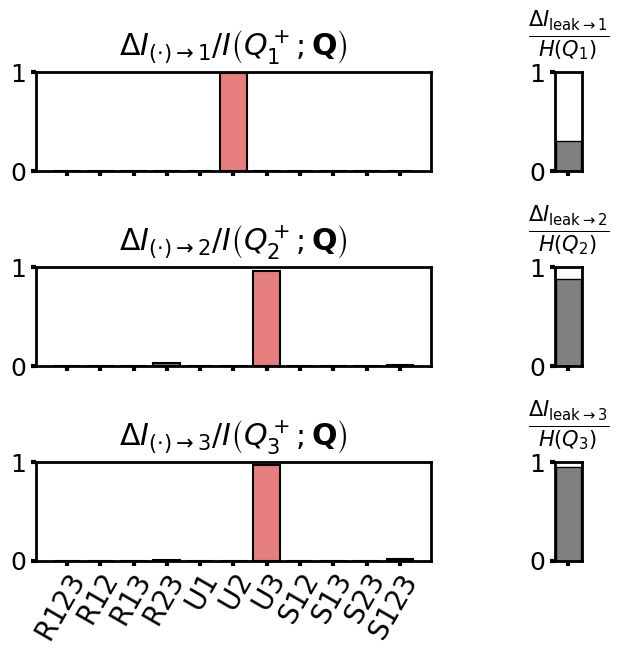

In [3]:
# Define paths for saving/loading data for each system
formatted_Nt = "{:.0e}".format(Nt).replace("+0", "").replace("+", "")
filepath = os.path.join('data', f"mediator_Nt_{formatted_Nt}.npy")

# Check if data is saved and load it, otherwise generate and save
if os.path.isfile(filepath):
    X = np.load(filepath)
    print(f"Loaded data for mediator")
else:
    qs = cases.mediator(Nt)
    X = np.array([q[-samples:] for q in qs])
    np.save(filepath, X)
    print(f"Generated and saved data for mediator")

nvars = X.shape[0]

# Prepare Subplots
fig, axs = plt.subplots(nvars, 2, figsize=(9, 2.3*nvars), gridspec_kw={'width_ratios': [35, 1]})

# Since the calculations of causalities are not coupled between variables, you can run each calculation in parallel and obtain and speed up corresponding to the number of variables
I_R, I_S, MI, info_leak = surd.run_parallel(X, nvars, nlag, nbins, axs)

# Uncomment this line and comment the previous line to run this code in series
# I_R, I_S, MI, info_leak = surd.run(X, nvars, nlag, nbins, axs)

plt.tight_layout(w_pad=-8, h_pad=0)
plt.show()